In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import scipy.stats as stats

In [10]:
def speed(v_1,v_2): 
    return 2*.04*abs(np.mean(v_1)-np.mean(v_2))

def error_hz(v_1,v_2): 
    return np.sqrt(np.std(v_1)**2+np.std(v_2)**2)

In [26]:
##The Raw Data
T = [1.76,1.80,1.90,1.97,2.04,2.098,2.13,2.25,2.37,2.65]

v_1 = [[1531,1532,1533],[1526,1530,1529],[1980,1979,1981],[1419,1421,1420],[1699,1700,1702],[1508,1508,1512],
       [1799,1801,1800],[1475,1477,1471],[788,786,790],[788,797,790]]

v_2 = [[1795,1798,1797],[1789,1790,1792],[2226,2225,2224],[1166,1168,1170],[1905,1909,1913],[1685,1685,1690],
      [1879,1880,1881],[1560,1558,1561],[672,674,676],[1168,1166,1170]]

In [36]:
u = np.zeros_like(T)
u_err = np.zeros_like(T)

for i in range(len(T)): 
    u[i] = speed(v_1[i],v_2[i])
    u_err[i] = error_hz(v_1[i],v_2[i])

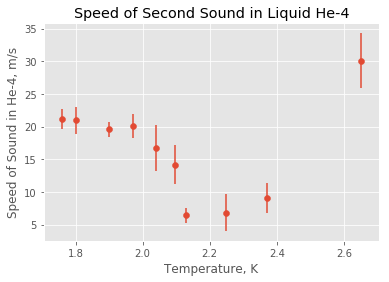

In [37]:
plt.scatter(T,u)
plt.errorbar(T, u, yerr=u_err, linestyle="None")
plt.title('Speed of Second Sound in Liquid He-4')
plt.xlabel('Temperature, K')
plt.ylabel('Speed of Sound in He-4, m/s')
plt.show()

In [38]:
## Fit wihtou the last two points, they were rather noisy
T_s = T[0:-2]
u_s = u[0:-2]
sigma_u_s = u_err[0:-2]

coeff = np.polyfit(T_s, u_s, deg = 2)
fit = np.poly1d(coeff)
xp = np.linspace(1.5, 2.3, 8)

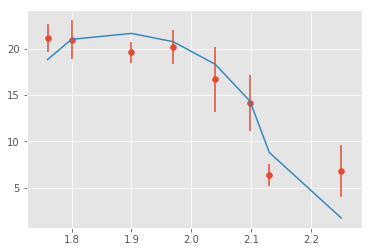

In [39]:
plt.scatter(T_s, u_s)
plt.errorbar(T_s, u_s, yerr=sigma_u_s, linestyle="None")
plt.plot(T_s, fit(xp))

In [33]:
## How is this fit 
print('Fit:y=',fit[0],fit[1],'x',fit[2],'x^2')
print('Chi Squared of fit:',stats.chisquare(fit(xp),u_s)[1]) 

Fit:y= -152.51589156600818 202.63983665619966 x -58.94054117247742 x^2
Chi Squared of fit: 0.6205503717386924
